In [3]:
import sys
"streamlit" in sys.modules



True

Dataset Shape: (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  

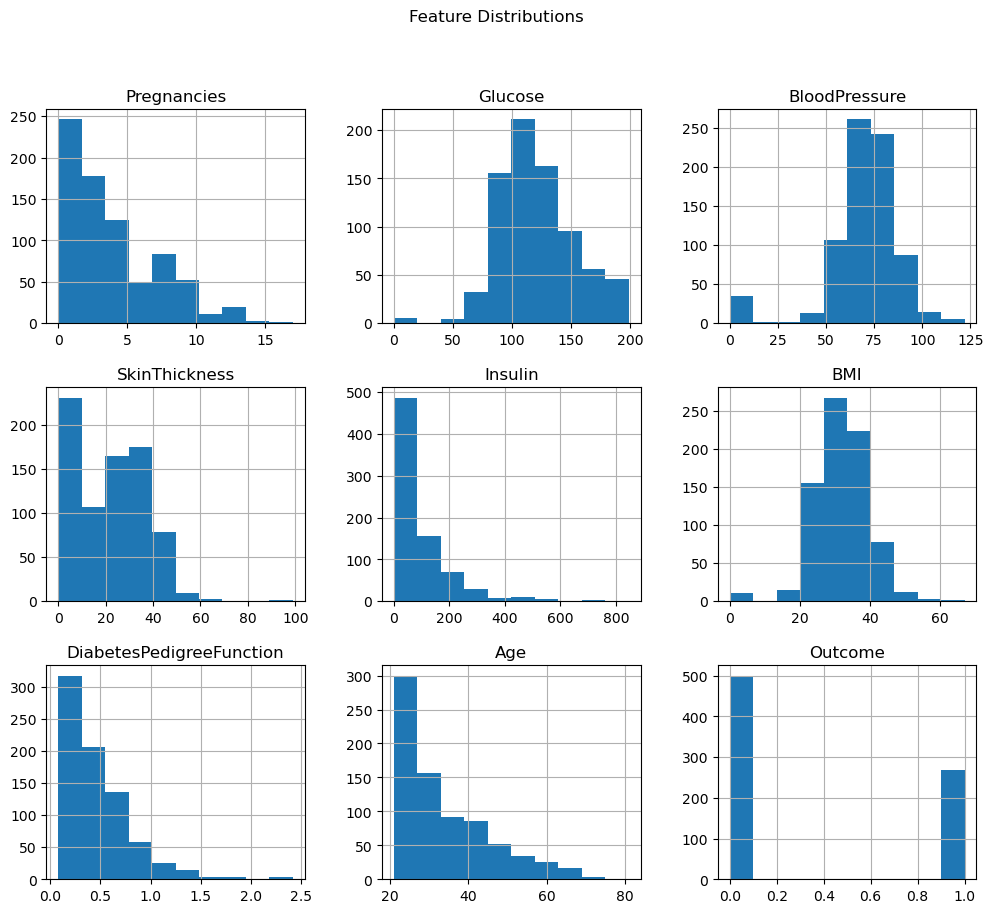

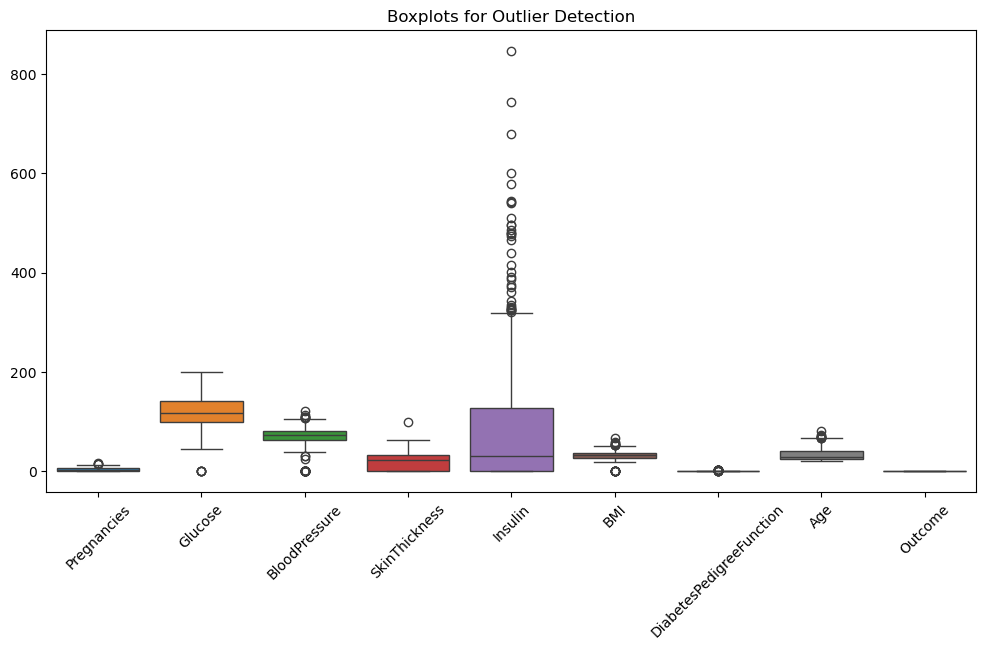

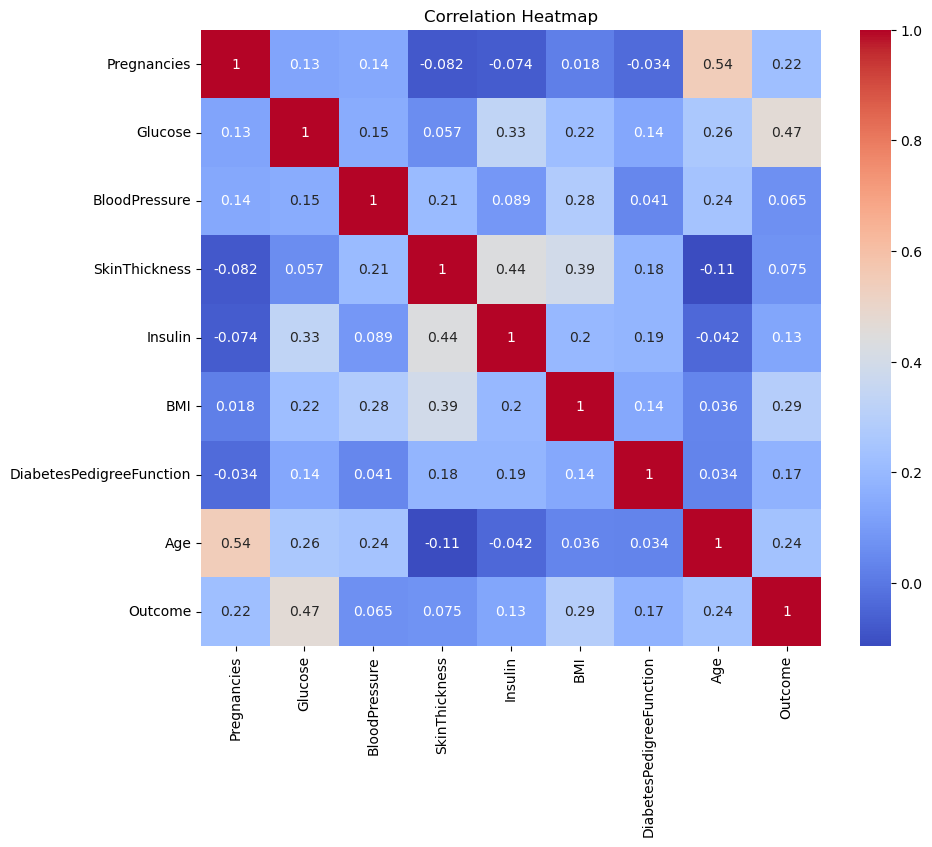

Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC-AUC: 0.812962962962963


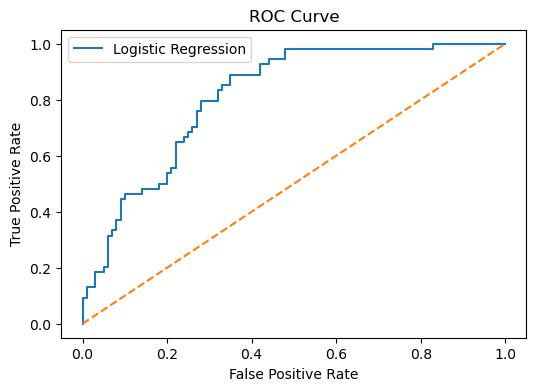

2026-02-16 21:09:48.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.366 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 21:09:48.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

                    Feature  Coefficient
1                   Glucose     1.182511
5                       BMI     0.688735
0               Pregnancies     0.377502
6  DiabetesPedigreeFunction     0.233386
7                       Age     0.147798
3             SkinThickness     0.028225
2             BloodPressure    -0.044066
4                   Insulin    -0.066157


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Load dataset
df = pd.read_csv(r"C:\Users\Aditi Karanth\Downloads\diabetes.csv")

# Basic exploration
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
# Histograms
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Detection")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)
import pickle

pickle.dump(model, open("diabetes_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
import numpy as np
import pickle
import threading

def my_threaded_function():
# Load model and scaler
    model = pickle.load(open("diabetes_model.pkl", "rb"))
    scaler = pickle.load(open("scaler.pkl", "rb"))

def start_thread():
        my_thread = threading.Thread(target=my_threaded_function)
        add_script_run_ctx(my_thread)
        my_thread.start()

st.title("Diabetes Prediction App")
st.write("Predict diabetes risk using medical inputs")


# User inputs
pregnancies = st.number_input("Pregnancies", 0, 20)
glucose = st.number_input("Glucose", 0, 200)
bp = st.number_input("Blood Pressure", 0, 150)
skin = st.number_input("Skin Thickness", 0, 100)
insulin = st.number_input("Insulin", 0, 900)
bmi = st.number_input("BMI", 0.0, 70.0)
dpf = st.number_input("Diabetes Pedigree Function", 0.0, 3.0)
age = st.number_input("Age", 1, 120)

# Prediction
if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    if prediction == 1:
        st.error(f"High Risk of Diabetes (Probability: {probability:.2f})")
    else:
        st.success(f"Low Risk of Diabetes (Probability: {probability:.2f})")
